In [1]:
# Les imports

# Les imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from functools import reduce
from collections import Counter


import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense,Input

import sklearn
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

from imblearn.combine import SMOTETomek 

from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
import tensorflow_datasets as tfds

# dataset import & manipulation


In [3]:
def form_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

    # convert from integers to floats
    x_train_float = x_train.astype('float32')
    x_test_float = x_test.astype('float32')
    # normalize to range 0-1
    x_train_norm = x_train_float / 255.0
    x_test_norm = x_test_float / 255.0
    
    #turn labels innnto categories array
    y_train_cat = to_categorical(y_train)
    y_test_cat = to_categorical(y_test)

    #put all train test values into one
    data = np.append(x_train_norm,x_test_norm,axis=0)
    label = np.append(y_train_cat,y_test_cat,axis=0)  
    data_list = list(data)
    label_list = list(label)  
    
    return data_list,label_list

création du nouveau dataset contenant les données des trains et test  pour faciliter les attributions aux teachers et student

In [4]:
def create_dataframe():

    dataset = pd.DataFrame(form_data())
    dataset_2 = dataset.transpose()
    dataset_2.columns = ['image','label']
    dataset_2.insert(0,'id',range(0,0+len(dataset_2)))


    #print(type(dataset_2.image))

    #print(dataset_2.image.values.shape)
    #print(type(dataset_2['label'][0]))
    return dataset_2

In [5]:
create_dataframe()

id                                              image  \
0          0  [[[0.23137255, 0.24313726, 0.24705882], [0.168...   
1          1  [[[0.6039216, 0.69411767, 0.73333335], [0.4941...   
2          2  [[[1.0, 1.0, 1.0], [0.99215686, 0.99215686, 0....   
3          3  [[[0.10980392, 0.09803922, 0.039215688], [0.14...   
4          4  [[[0.6666667, 0.7058824, 0.7764706], [0.658823...   
...      ...                                                ...   
59995  59995  [[[0.29803923, 0.30588236, 0.52156866], [0.298...   
59996  59996  [[[0.31764707, 0.22352941, 0.16862746], [0.356...   
59997  59997  [[[0.078431375, 0.05882353, 0.047058824], [0.0...   
59998  59998  [[[0.09803922, 0.15686275, 0.047058824], [0.05...   
59999  59999  [[[0.28627452, 0.30588236, 0.29411766], [0.384...   

                                                   label  
0      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...  
1      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3      [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...  
4      [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
...                                                  ...  
59995  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...  
59996  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
59997  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...  
59998  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
59999  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...  

[60000 rows x 3 columns]

In [6]:
#print(dataset_2.info())
#print(dataset_2.head(5))

In [7]:
"""print(type(dataset_2['label'][0]))

#dataset_2['label'] =list(map(lambda x: int(x), dataset_2['label']))
dataset_2.insert(0,'id',range(0,0+len(dataset_2)))
dataset_2.head(5)"""

"print(type(dataset_2['label'][0]))\n\n#dataset_2['label'] =list(map(lambda x: int(x), dataset_2['label']))\ndataset_2.insert(0,'id',range(0,0+len(dataset_2)))\ndataset_2.head(5)"

In [8]:
"""pyplot.imshow(dataset_2['image'][0])
pyplot.show()"""


"pyplot.imshow(dataset_2['image'][0])\npyplot.show()"

In [9]:
"""for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i])
# show the figure
pyplot.show()"""

'for i in range(9):\n\t# define subplot\n\tpyplot.subplot(330 + 1 + i)\n\t# plot raw pixel data\n\tpyplot.imshow(x_train[i])\n# show the figure\npyplot.show()'

In [10]:
"""print(y_train[1])"""

'print(y_train[1])'

# séparation des données

séparer les données du train & test pour chaque teacher et puis au student


- nous donnons au student 250 samples de train et 50 sample de test
- chaque teacher doit avoir une quantité égale de sample train & test
- 50k train & 10k test --> 60k total (w/ 300 samples to student ) --> 14 925 samples per teacher


In [11]:
#print(dataset_2.head())



In [12]:
datasets_teacher_student = {"Teacher_1":None,"Teacher_2":None,"Teacher_3":None,"Teacher_4":None,"student":None}

for_now = create_dataframe()
for i in datasets_teacher_student.keys():
    if i != "student":
        data_take = for_now.sample(n=14925, random_state=1)
        data_take= data_take.reset_index()
        datasets_teacher_student[i] = data_take

        list_id = list(filter(lambda x : x in for_now['id'],data_take['id']))
        for_now = for_now.drop(
            for_now[
                for_now.id.isin(list_id)
                ].index
            )
    else:
        data_take = for_now.sample(n=300, random_state=1)
        data_take = data_take.reset_index()
        datasets_teacher_student[i] = data_take

        list_id = list(filter(lambda x : x in for_now['id'],data_take['id']))
        for_now = for_now.drop(
            for_now[
                for_now.id.isin(list_id)
                ].index
            )


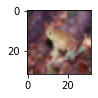

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [13]:
dataset = datasets_teacher_student['Teacher_1']
# define subplot
pyplot.subplot(330 + 1 + 0)
# plot raw pixel data
pyplot.imshow(dataset.image[1])
# show the figure
pyplot.show()

print(dataset.label[1])


In [14]:

for i in datasets_teacher_student.keys():
    dict_values = {"0":None,"1":None,"2":None,"3":None,"4":None,"5":None,"6":None,"7":None,"8":None,"9":None}
    arr = []


    labels = datasets_teacher_student[i].label

    results = list(map(lambda x:list(x).index(1.0),labels))
    arr = results
    arr = np.array(arr)
    #print(arr)
    #print(arr.value_counts())

    for j in range(10):
        count = np.count_nonzero(arr == j)
        print('in {} there are {}:{}'.format(i,j,count))
        
    """
    #print(datasets_teacher_student[i].info())
    for ar in datasets_teacher_student[i]['label']:
        #print(ar)
        #print(np.where(ar==1.0))
        np.insert(arr, np.where(arr==1.0), axis=1)

    print(np.bincount(arr))"""


in Teacher_1 there are 0:1465
in Teacher_1 there are 1:1492
in Teacher_1 there are 2:1482
in Teacher_1 there are 3:1484
in Teacher_1 there are 4:1507
in Teacher_1 there are 5:1506
in Teacher_1 there are 6:1498
in Teacher_1 there are 7:1565
in Teacher_1 there are 8:1486
in Teacher_1 there are 9:1440
in Teacher_2 there are 0:1510
in Teacher_2 there are 1:1480
in Teacher_2 there are 2:1423
in Teacher_2 there are 3:1448
in Teacher_2 there are 4:1486
in Teacher_2 there are 5:1537
in Teacher_2 there are 6:1529
in Teacher_2 there are 7:1452
in Teacher_2 there are 8:1504
in Teacher_2 there are 9:1556
in Teacher_3 there are 0:1468
in Teacher_3 there are 1:1494
in Teacher_3 there are 2:1540
in Teacher_3 there are 3:1532
in Teacher_3 there are 4:1492
in Teacher_3 there are 5:1481
in Teacher_3 there are 6:1467
in Teacher_3 there are 7:1525
in Teacher_3 there are 8:1477
in Teacher_3 there are 9:1449
in Teacher_4 there are 0:1528
in Teacher_4 there are 1:1503
in Teacher_4 there are 2:1517
in Teacher

## création de fonction permettant de transferer les données en train_test

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def train_test_splitting(data):
    #print(type(data.image))
    #print(data.image[0])
    
    """X = pad_sequences(data.image)
    Y = pad_sequences(data.label)"""

    arr = []
    for i in data.image.values:
        arr.append(i)

    X = np.array(arr)
    Y = pad_sequences(data.label)
    #padded_X = np.expand_dims(padded, axis = 0)
    #print(Y.shape) # (1, 3, 4)
    #.reshape(1,data.image.shape,data.image[0].shape)

    X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,random_state=42)

    #print(type(X_train))
    print('here')
    #print(X_train[:1])
    #print(y_train[:1])



    return X_train,X_test,y_train,y_test

In [16]:
#train_test_splitting(create_dataframe())

In [17]:
results = train_test_splitting(datasets_teacher_student['student'])
#[print(i.shape, i.dtype) for i in results[2]]


here


# Partie ML

## création des models ML pour chaque model teacher & student

utilisation de keras (tensorflow) pour la création des models (utile par la labélisation des images)

In [18]:
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
from keras.metrics import SparseCategoricalCrossentropy
from keras.constraints import maxnorm

import random

In [19]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

In [46]:
def run_test_harness(data):
	
	X_train,X_test,y_train,y_test = train_test_splitting(data)
	# define model
	model = define_model()
	# fit model
	history = model.fit(X_train, y_train, epochs=1, batch_size=100, validation_data=(X_test, y_test))#, verbose=0)
	# evaluate model
	_, acc = model.evaluate(X_test, y_test, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

	return model,X_train,X_test,y_train,y_test

In [47]:
datasets_model_Teacher_student = {"Teacher_1":None,"Teacher_2":None,"Teacher_3":None,"Teacher_4":None,"student":None}

for i in datasets_teacher_student.keys():
    datasets_model_Teacher_student[i] = run_test_harness(datasets_teacher_student[i])
    



here
105/105 [==============================] - 28s 263ms/step - loss: 2.2541 - accuracy: 0.1582 - val_loss: 2.0000 - val_accuracy: 0.2727
> 27.267
here
105/105 [==============================] - 29s 272ms/step - loss: 2.2118 - accuracy: 0.1813 - val_loss: 1.9014 - val_accuracy: 0.3251
> 32.515
here
105/105 [==============================] - 30s 280ms/step - loss: 2.3318 - accuracy: 0.1417 - val_loss: 2.0523 - val_accuracy: 0.2575
> 25.748
here
105/105 [==============================] - 29s 271ms/step - loss: 2.2707 - accuracy: 0.1650 - val_loss: 1.9685 - val_accuracy: 0.2986
> 29.857
here
3/3 [==============================] - 1s 317ms/step - loss: 2.5010 - accuracy: 0.1221 - val_loss: 2.3410 - val_accuracy: 0.1000
> 10.000


## partie prediction des models

In [192]:
def predictions(dictionary,prediction):
    
    increments = np.zeros(10)
    array_ = []
    for preds in prediction:
        result = []

        preds = np.array([preds])
        #print(preds)
        for key_ in dictionary.keys():
            model = dictionary[key_][0]
            result.append(np.argmax(model.predict(preds)))

        for i in range(len(increments)):
            for value in result:
                if i == value:
                    increments[i]+=1

        
        array_.append(increments)
        increments = []
        break
        
        
    return array_

In [194]:
vote_prediction = predictions(datasets_model_Teacher_student, datasets_model_Teacher_student['student'][2])
print(vote_prediction[0])

[0. 1. 0. 0. 3. 0. 1. 0. 0. 0.]


In [ ]:
#predictions(datasets_model_Teacher_student,...)    

# test autre code

In [ ]:
# baseline model with dropout on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    print(type(train_norm))

    return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	print(trainX.shape)
	print(len(trainX[0]))
	print(len(trainX))
	"""
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)"""

# entry point, run the test harness


<class 'numpy.ndarray'>
(50000, 32, 32, 3)
32
50000


In [39]:
arr = np.array([])
result = 5
arr = np.insert(arr,0,[5])
print(arr)

[5.]


In [40]:
arr = np.insert(arr,0,[5])
print(arr)

[5. 5.]


In [43]:
np.argmax([0,0,1],axis=0)

2

In [91]:
np.append([1, 2, 3], [[4, 5, 6], [7, 8, 9]])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])